# The goal of this analysis is to better understand where terrorists attacks are normally taking place, who is committing them, and how are they carrying out these attacks.

In [2]:
import numpy as np
import pandas as pd
import os
import glob
pd.options.mode.chained_assignment = None
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [4]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        ana_4_data=pd.read_csv(source, low_memory=False, encoding='ISO-8859-1')
ana_4_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
#ana_1_data = ana_1_data.rename(
#    columns={'eventid':'id','iyear':'year', 'imonth':'month','iday':'day',
#             'country_txt':'country','provstate':'state','targtype1_txt':'target',
#             'weaptype1_txt':'weapon', 'nkill':'fatalities', 'nwound':'injuries', 'gname':'Terrorist_Group'})

#ana_1_data['fatalities'] = ana_1_data['fatalities'].fillna(0).astype(int)
#ana_1_data['injuries'] = ana_1_data['injuries'].fillna(0).astype(int)

#terror_india = ana_1_data[(ana_1_data.longitude > 0)]

#terror_india['day'][terror_india.day == 0] = 1
#terror_india['date'] = pd.to_datetime(terror_india[['day', 'month', 'year']])

#terror_india = terror_india[['id', 'date', 'year', 'state', 'latitude', 'longitude',
#                         'target', 'weapon', 'fatalities', 'injuries']]

#terror_india = terror_india.sort_values(['fatalities', 'injuries'], ascending = False)
#terror_india = terror_india.drop_duplicates(['date', 'latitude', 'longitude', 'fatalities'])
#terror_india['state'] = terror_india['state'].str.lower()

#terror_india.head()

In [48]:
ana_4_data['nwound'] = ana_4_data['nwound'].fillna(0).astype(int)
sample_DF = ana_4_data[['attacktype1_txt', 'nwound', 'gname']]

attack_count = sample_DF[sample_DF.attacktype1_txt != 'Unknown'].groupby(['attacktype1_txt']).size().sort_values(ascending = False).to_frame(name = 'Attack_Count').reset_index()
attack_death = sample_DF[sample_DF.attacktype1_txt != 'Unknown'].groupby(['attacktype1_txt'])['nwound'].sum().sort_values(ascending = False).to_frame(name = 'Attack_Death').astype(int).reset_index()

attack_data = pd.merge(attack_count, attack_death, on = 'attacktype1_txt', how = 'inner')

attack_data

,attacktype1_txt,Attack_Count,Attack_Death
0,Bombing/Explosion,75963,326000
1,Armed Assault,37554,67086
2,Assassination,17582,12378
3,Hostage Taking (Kidnapping),9115,4633
4,Facility/Infrastructure Attack,8849,3454
5,Hostage Taking (Barricade Incident),835,1847
6,Unarmed Assault,828,12540
7,Hijacking,556,553


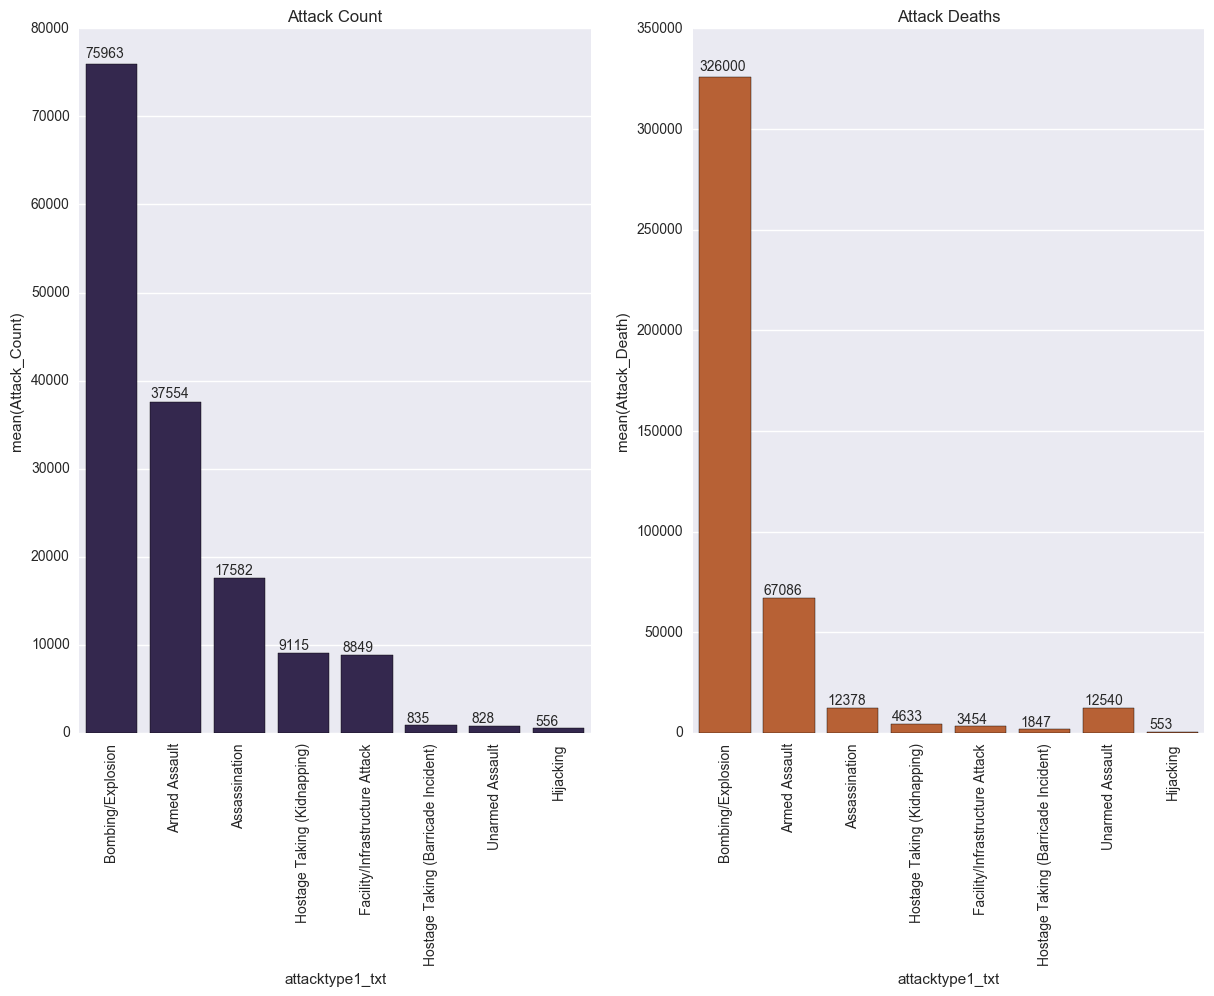

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1 = sns.barplot(x="attacktype1_txt", y="Attack_Count", data=attack_data, ax=ax1, color="#322254") 
ax1.set_title('Attack Count')

ax2 = sns.barplot(x="attacktype1_txt", y="Attack_Death", data=attack_data, ax=ax2, color="#cc5a20") 
ax2.set_title('Attack Deaths')


plt.subplots_adjust(right=2, top=4)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')
        
plt.savefig('ana_4\\terrgroupcounts.png', bbox_inches='tight')

In [50]:
Group_Attack_Count = sample_DF[sample_DF.gname != 'Unknown'].groupby(['gname']).size().sort_values(ascending = False).to_frame(name = 'Attack_Count').reset_index()
Group_Attack_Death = sample_DF[sample_DF.gname != 'Unknown'].groupby(['gname'])['nwound'].sum().sort_values(ascending = False).to_frame(name = 'Attack_Death').astype(int).reset_index()

Group_Attack_Data = pd.merge(Group_Attack_Count, Group_Attack_Death, on = 'gname', how = 'inner')

Group_Attack_Data = Group_Attack_Data.sort_values(['Attack_Death'], ascending = False)

Group_Attack_Data.head(4)

,gname,Attack_Count,Attack_Death
0,Taliban,5502,19230
3,Islamic State of Iraq and the Levant (ISIL),2833,17432
12,Liberation Tigers of Tamil Eelam (LTTE),1606,11011
22,Al-Qaida in Iraq,635,10238


In [52]:
Group_Taliban = sample_DF[(sample_DF.gname == 'Taliban') & (sample_DF.attacktype1_txt != 'Unknown')].groupby(['attacktype1_txt']).size().sort_values(ascending = False).to_frame(name = 'Attack_Taliban').reset_index()
Group_ISIL = sample_DF[(sample_DF.gname == 'Islamic State of Iraq and the Levant (ISIL)') & (sample_DF.attacktype1_txt != 'Unknown')].groupby(['attacktype1_txt']).size().sort_values(ascending = False).to_frame(name = 'Attack_ISIL').reset_index()
Group_LTTE = sample_DF[(sample_DF.gname == 'Liberation Tigers of Tamil Eelam (LTTE)') & (sample_DF.attacktype1_txt != 'Unknown')].groupby(['attacktype1_txt']).size().sort_values(ascending = False).to_frame(name = 'Attack_LTTE').reset_index()
Group_Al_Qaida = sample_DF[(sample_DF.gname.str.contains('Al-Qaida')) & (sample_DF.attacktype1_txt != 'Unknown')].groupby(['attacktype1_txt']).size().sort_values(ascending = False).to_frame(name = 'Attack_Al_Qaida').reset_index()

#Group_Al_Qaida

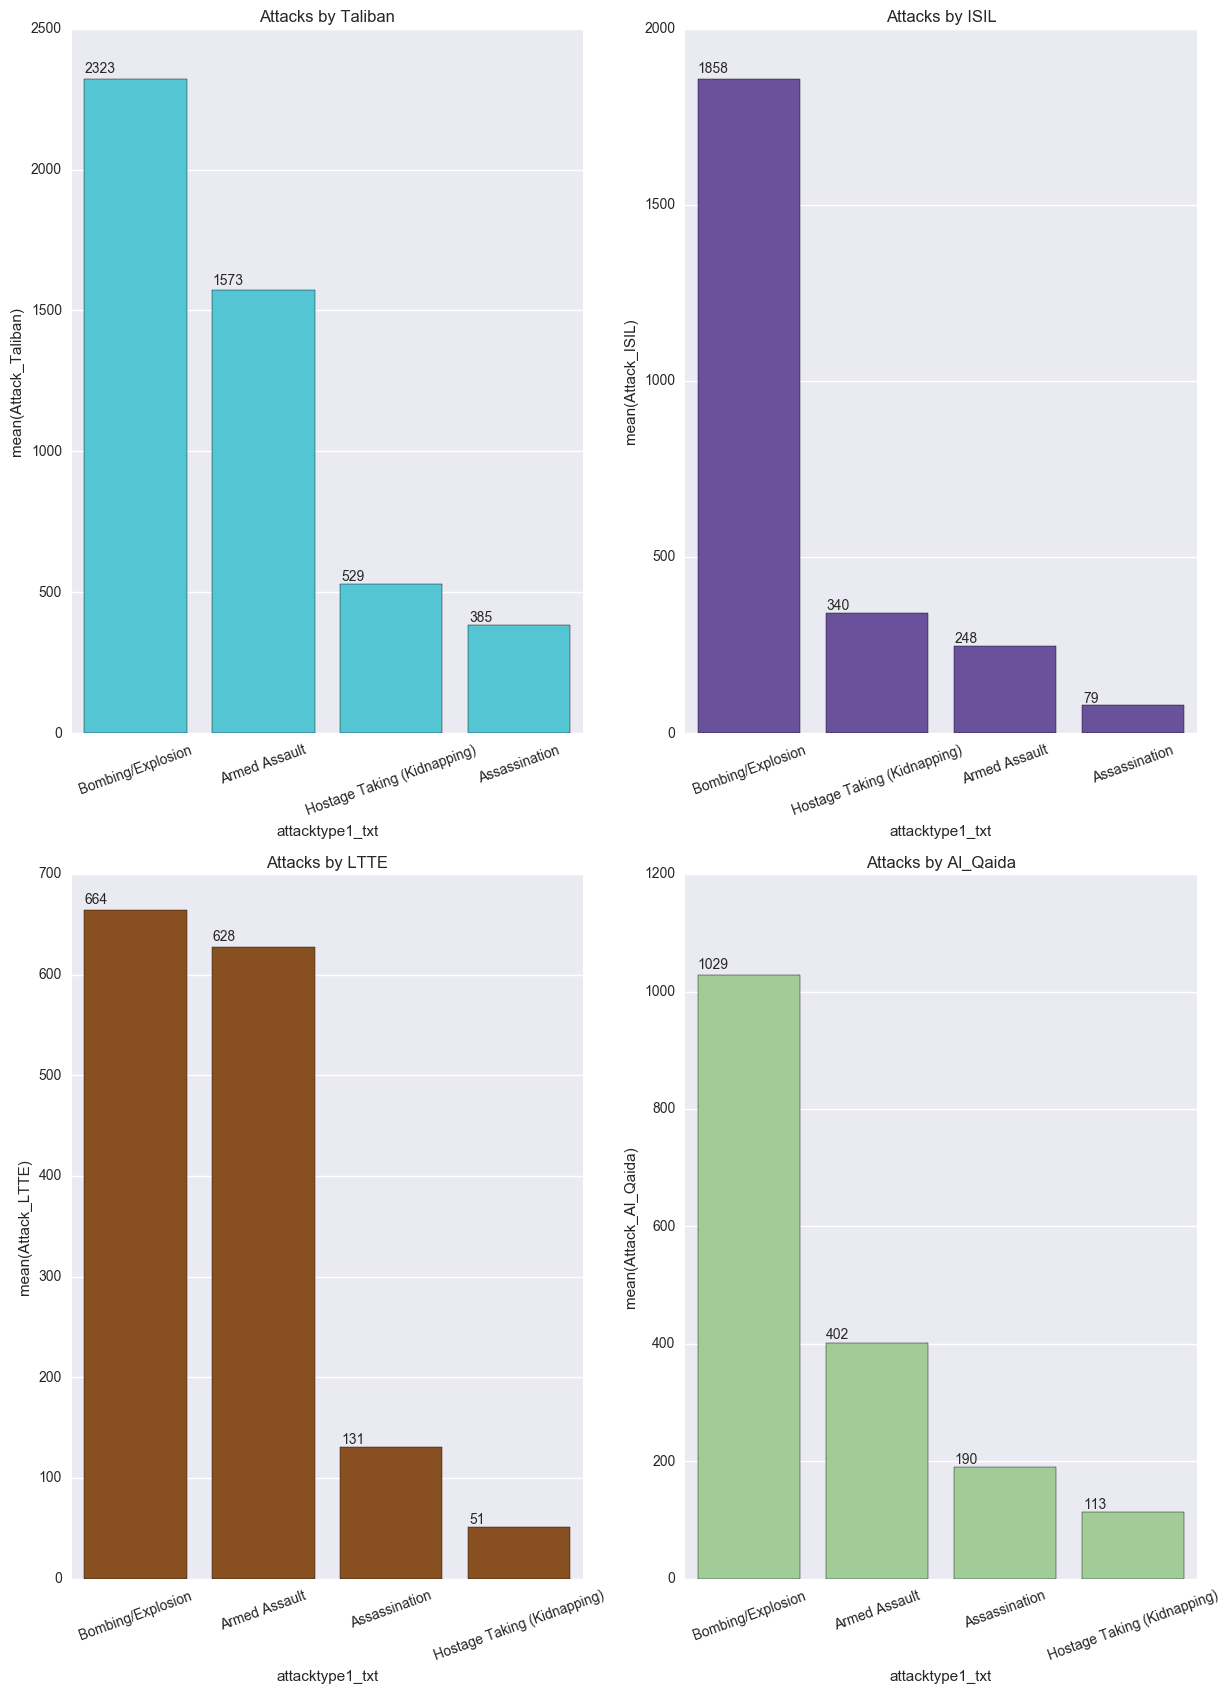

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1 = sns.barplot(x="attacktype1_txt", y="Attack_Taliban", data=Group_Taliban.head(4), ax=ax1, color="#3ed6e8") 
ax1.set_title('Attacks by Taliban')

ax2 = sns.barplot(x="attacktype1_txt", y="Attack_ISIL", data=Group_ISIL.head(4), ax=ax2, color="#6544a9") 
ax2.set_title('Attacks by ISIL')

ax3 = sns.barplot(x="attacktype1_txt", y="Attack_LTTE", data=Group_LTTE.head(4), ax=ax3, color="#994e0f") 
ax3.set_title('Attacks by LTTE')

ax4 = sns.barplot(x="attacktype1_txt", y="Attack_Al_Qaida", data=Group_Al_Qaida.head(4), ax=ax4, color="#9cd58e") 
ax4.set_title('Attacks by Al_Qaida')

plt.subplots_adjust(right=2, top=4)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
    
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')
        
plt.savefig('ana_4\\terrgrouppattern.png', bbox_inches='tight')